## 1. Bibliotecas e configurações utilizadas

In [1]:
#--- Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#--- Configurações adicionais

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option("display.max_columns", None)

## 2. Estrutura dos dados

In [2]:
dados = pd.read_csv(filepath_or_buffer = "output-dados-case.csv")

dados["Lead Created At"] = pd.to_datetime(dados["Lead Created At"], format = "%Y-%m-%d")
dados.head()

,Lead Created At,Lead Id,Purchase Source,JID,tempo_jornada,flag_jornada,flag_venda,Canal
0,2020-01-06 22:39:00,MSS-00003108-bf9d-4679-8780-36931ab4ae49-2020,fb-geral-lookalike-dco,1,1.0,Primeiro Contato,0.0,FB
1,2020-02-21 19:18:00,MSS-00003108-bf9d-4679-8780-36931ab4ae49-2020,sms-pre-carnaval-abandono,2,47.0,Ultimo Contato,0.0,SMS
2,2020-05-13 14:15:00,MSS-000031d0-5499-4e58-a88d-9afbcbb8ee9a-2019,yt-rmkt-videos-videovendas3,3,143.0,Ultimo Contato,0.0,YT
3,2020-07-23 22:28:00,MSS-00003bb2-b409-47b3-862f-e6c82b311d0c-2020,insta-bio,1,1.0,Primeiro Contato,0.0,FB
4,2020-05-12 22:51:00,MSS-0000610b-1170-47f5-990b-239d6eaef81b-2020,fb-rmkt-video-dco,1,1.0,Primeiro Contato,0.0,FB


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309959 entries, 0 to 309958
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Lead Created At  309959 non-null  datetime64[ns]
 1   Lead Id          309959 non-null  object        
 2   Purchase Source  309959 non-null  object        
 3   JID              309959 non-null  int64         
 4   tempo_jornada    309959 non-null  float64       
 5   flag_jornada     309959 non-null  object        
 6   flag_venda       293612 non-null  float64       
 7   Canal            309959 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 18.9+ MB


---

## Para não se perder:

- **Lead Created At**: É a data em que o lead visitou a nossa página de vendas

- **Lead Id**: É o identificador único de cada usuário (lead)

- **Purchase Source**: É a origem do tráfego daquele usuário

- **JID**: É o ID da Jornada do usuário (se é a primeira, segunda, terceira... vez que ele acessa nossa página de vendas)

- **Tempo_jornada**: Indica o delta de tempo entre a ultima vez que o lead visitou a página e a jornada atual

- **flag_venda**: Indica se o lead efetuou uma compra naquela jornada

- **Canal**: É o canal de origem do tráfego daquele usuário (Google, Youtube, Facebook...)

---

## 3. Análise Exploratória

In [4]:
dados["tempo_jornada"].describe().T.round(2)

count    309959.00
mean         40.00
std         107.64
min           1.00
25%           1.00
50%           1.00
75%           2.00
max         728.00
Name: tempo_jornada, dtype: float64

In [5]:
dados["Purchase Source"].value_counts(normalize = True).mul(100)

direto                                                13.307566
fb-geral-aquario-dco                                   6.883168
fb-rmkt-video-dco                                      5.311025
google-search-brand                                    4.182166
fb-lead-interesses-dco_masterclass                     2.580019
                                                        ...    
fb-lead-lal-app-engajados-purchase-estatico-flavio     0.000323
rmkt-videos-inspiracional                              0.000323
yt-int-eventos-vendavendas                             0.000323
mail-newsletter21-prospectms                           0.000323
google-discovery-demo-frases                           0.000323
Name: Purchase Source, Length: 1399, dtype: float64

In [6]:
dados["JID"].value_counts(normalize = True)

1     0.731268
2     0.177085
3     0.057395
4     0.020103
5     0.007698
        ...   
61    0.000003
62    0.000003
63    0.000003
64    0.000003
47    0.000003
Name: JID, Length: 81, dtype: float64

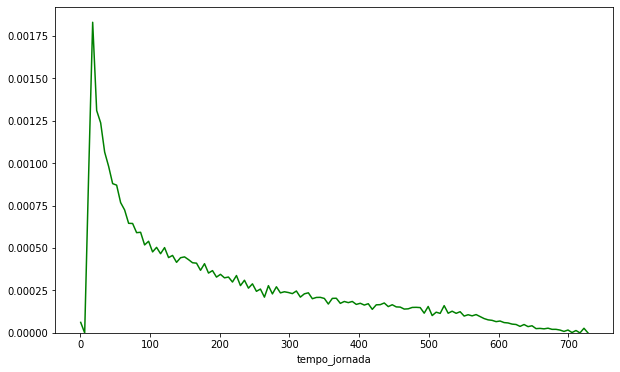

In [7]:
_ = plt.figure(figsize = [10, 6])
_ = sns.distplot(dados["tempo_jornada"], hist = False, color = "g")

plt.savefig('grafico1.png')

In [8]:
dados["flag_jornada"].value_counts(normalize = True)

Primeiro Contato    0.731268
Ultimo Contato      0.214899
Intermediarios      0.053833
Name: flag_jornada, dtype: float64

- Chutando:

    - 0: Não houve a venda
    - 1: Houve venda

In [9]:
dados["flag_venda"].value_counts(normalize = True)

0.0    0.965996
1.0    0.034004
Name: flag_venda, dtype: float64

In [10]:
dados["Canal"].value_counts(normalize = True)

FB        0.578557
Direto    0.133076
GG        0.089292
YT        0.054065
EMKT      0.047958
SMS       0.033356
APP       0.028162
GV        0.009953
Outros    0.009230
ATEND     0.008695
BLOG      0.007656
Name: Canal, dtype: float64

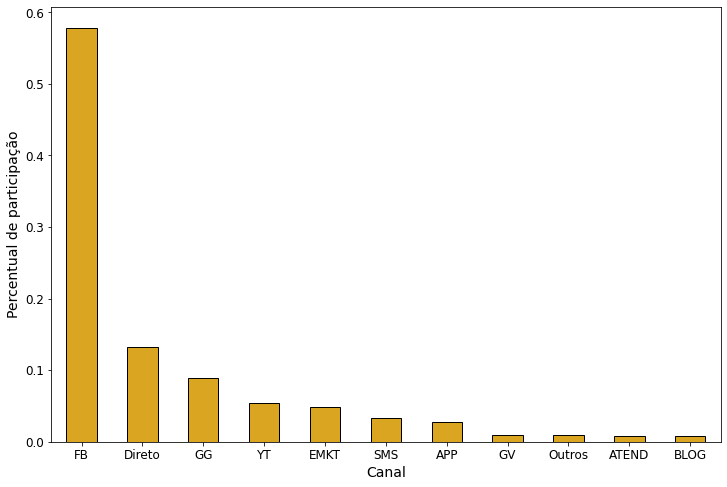

In [11]:
_ = plt.figure(figsize = [12, 8])
_ = dados["Canal"].value_counts(normalize = True).plot(kind = "bar", color = "goldenrod", edgecolor = "black")
_ = plt.xlabel("Canal", fontsize = 14, color = "black")
_ = plt.ylabel("Percentual de participação", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
_ = plt.xticks(rotation = 0)


plt.savefig('grafico8.png')

### 3.1. Volume de leads gerados por dia

In [12]:
#--- Criando uma variável que é um indicador 1 para todas as observações

dados["indicador_leads"] = 1

vol_diarios_leads = dados.resample("D", on = "Lead Created At")["indicador_leads"].sum()
vol_diarios_leads.head()

Lead Created At
2020-01-01    1472
2020-01-02    1976
2020-01-03    1617
2020-01-04    1807
2020-01-05    2040
Freq: D, Name: indicador_leads, dtype: int64

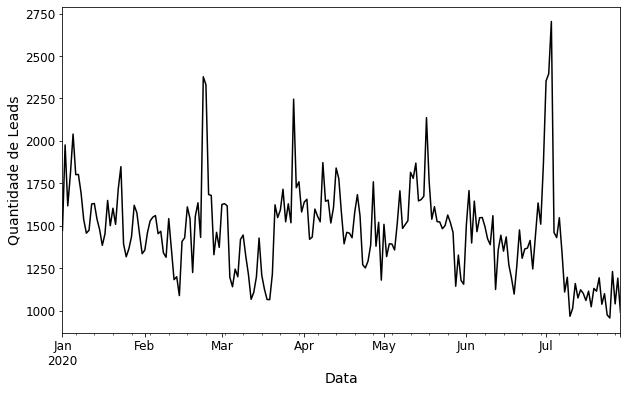

In [13]:
_ = plt.figure(figsize = [10, 6])
_ = vol_diarios_leads.plot(kind = "line", color = "black")
_ = plt.xlabel("Data", fontsize = 14, color = "black")
_ = plt.ylabel("Quantidade de Leads", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
_ = plt.xticks(rotation = 0)

plt.savefig('grafico2.png')

### 3.2. Volume de leads gerados por dia (por Canal)

- Peço desculpas pela falta de um loop ou algo mais efetivo :) 

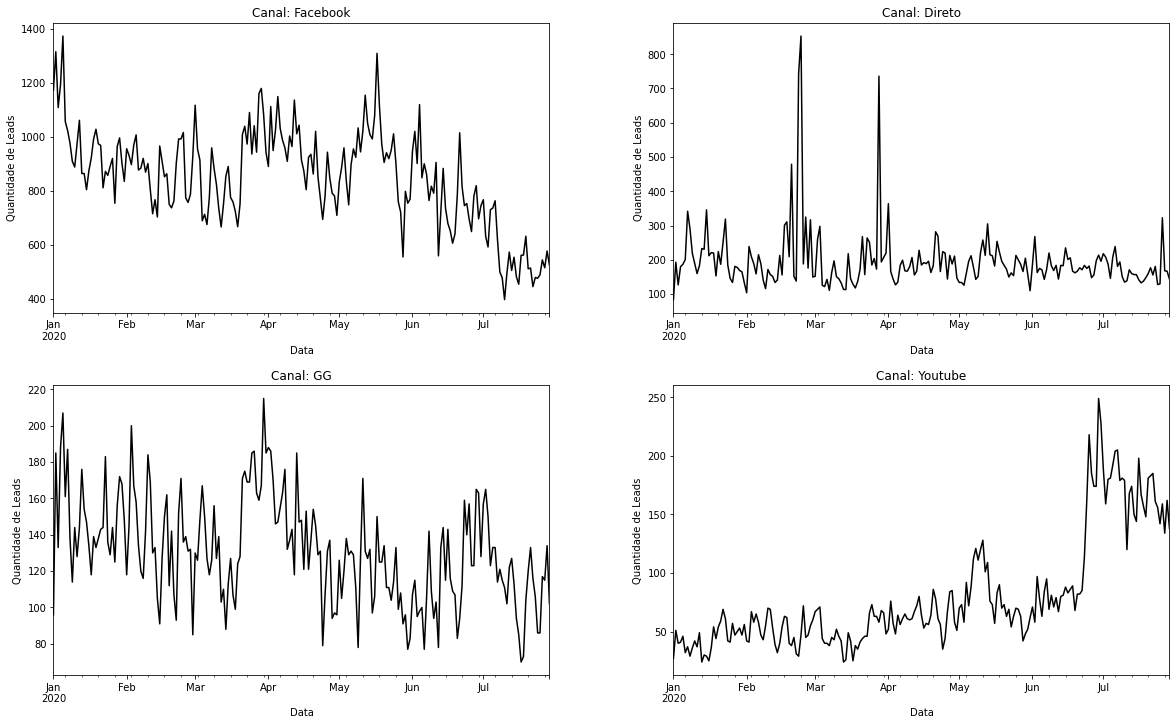

In [14]:
fig = plt.figure(figsize = [20, 12])

fig.subplots_adjust(hspace = 0.25, wspace = 0.25) 

plt.subplot(2, 2, 1)
_ = dados[dados["Canal"] == "FB"].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Facebook")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de Leads", color = "black")

plt.subplot(2, 2, 2)
_ = dados[dados["Canal"] == "Direto"].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Direto")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de Leads", color = "black")

plt.subplot(2, 2, 3)
_ = dados[dados["Canal"] == "GG"].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: GG")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de Leads", color = "black")

plt.subplot(2, 2, 4)
_ = dados[dados["Canal"] == "YT"].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Youtube")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de Leads", color = "black")


plt.savefig('grafico3.png')

### 3.3. Volume de vendas geradas por dia

In [15]:
vol_diarios_compras = dados[dados["flag_venda"] == 1].resample("D", on = "Lead Created At")["indicador_leads"].sum()

vol_diarios_compras.head()

Lead Created At
2020-01-01    47
2020-01-02    70
2020-01-03    48
2020-01-04    81
2020-01-05    73
Freq: D, Name: indicador_leads, dtype: int64

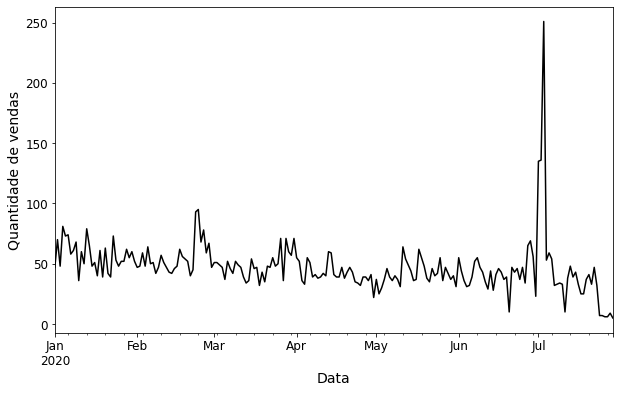

In [16]:
_ = plt.figure(figsize = [10, 6])
_ = vol_diarios_compras.plot(kind = "line", color = "black")
_ = plt.xlabel("Data", fontsize = 14, color = "black")
_ = plt.ylabel("Quantidade de vendas", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.savefig('grafico4.png')

### 3.4. Volume de vendas geradas por dia (por Canal)

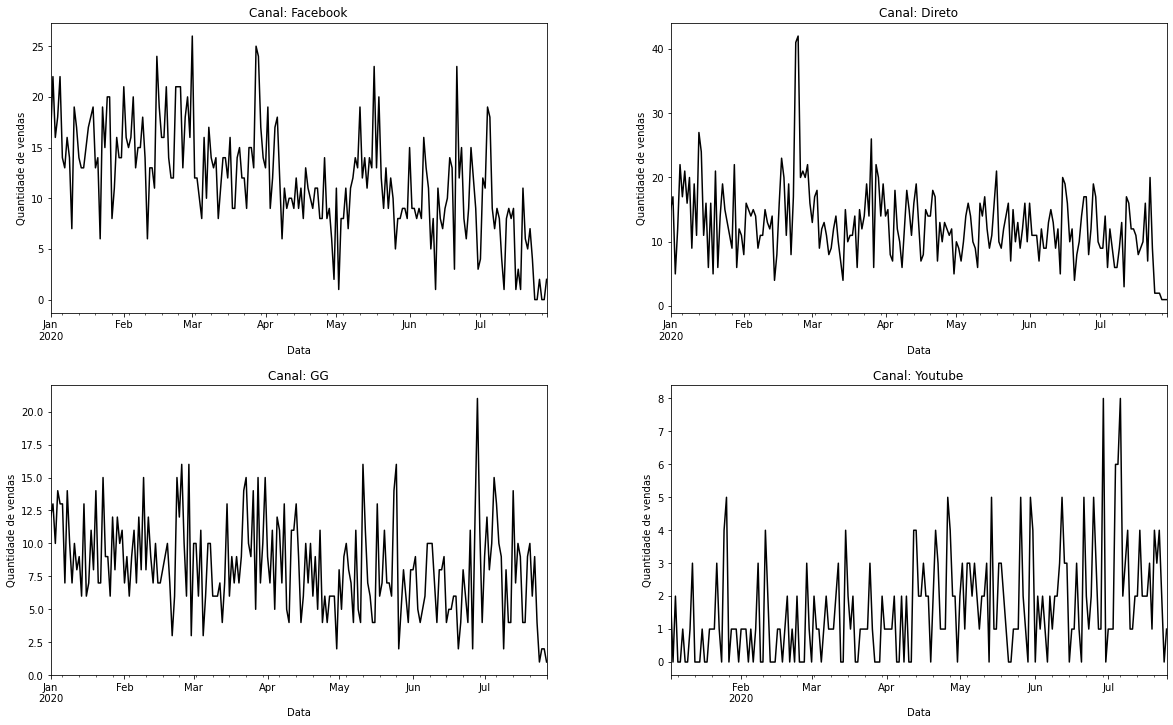

In [17]:
fig = plt.figure(figsize = [20, 12])

fig.subplots_adjust(hspace = 0.25, wspace = 0.25) 

plt.subplot(2, 2, 1)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "FB")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Facebook")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de vendas", color = "black")

plt.subplot(2, 2, 2)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "Direto")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Direto")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de vendas", color = "black")

plt.subplot(2, 2, 3)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "GG")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: GG")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de vendas", color = "black")

plt.subplot(2, 2, 4)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "YT")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Youtube")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Quantidade de vendas", color = "black")


plt.savefig('grafico5.png')

### 3.5. Volume de visitas dos tempos médios de jornada

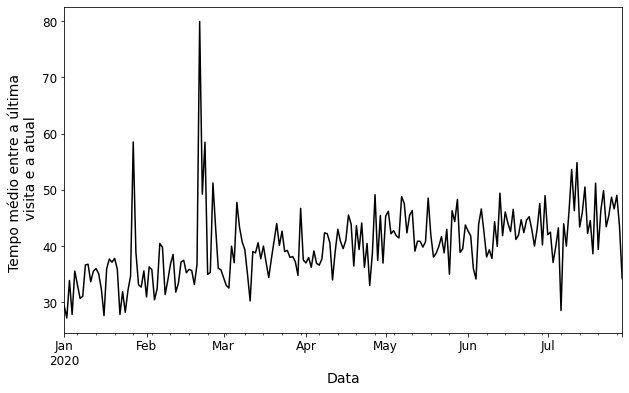

In [18]:
_ = plt.figure(figsize = [10, 6])
_ = dados.resample("D", on = "Lead Created At")["tempo_jornada"].mean().plot(kind = "line", color = "black")
_ = plt.xlabel("Data", fontsize = 14, color = "black")
_ = plt.ylabel("Tempo médio entre a última \n visita e a atual", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.savefig('grafico6.png')

### 3.6. Volume de visitas tempos de jornada

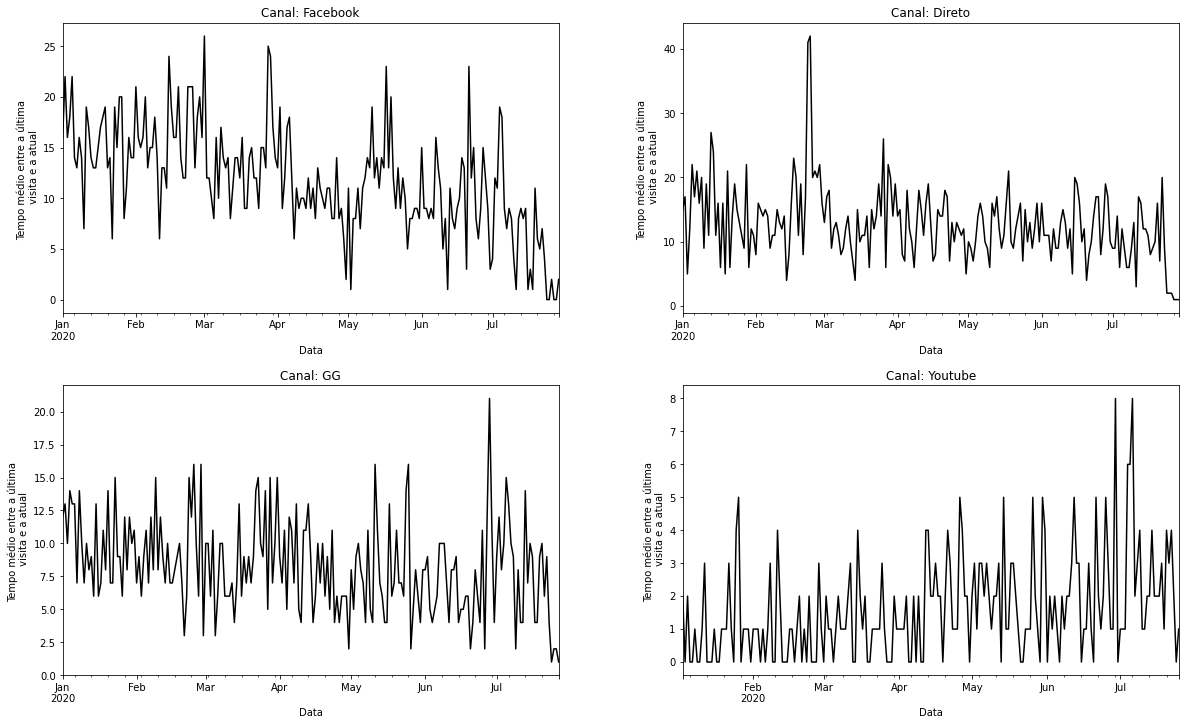

In [19]:
fig = plt.figure(figsize = [20, 12])

fig.subplots_adjust(hspace = 0.25, wspace = 0.25) 

plt.subplot(2, 2, 1)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "FB")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Facebook")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Tempo médio entre a última \n visita e a atual", color = "black")

plt.subplot(2, 2, 2)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "Direto")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Direto")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Tempo médio entre a última \n visita e a atual", color = "black")

plt.subplot(2, 2, 3)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "GG")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: GG")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Tempo médio entre a última \n visita e a atual", color = "black")

plt.subplot(2, 2, 4)
_ = dados[(dados["flag_venda"] == 1) & (dados["Canal"] == "YT")].resample("D", on = "Lead Created At")["indicador_leads"].sum().plot(kind = "line", color = "black")
_ = plt.title("Canal: Youtube")
_ = plt.xlabel("Data", color = "black")
_ = plt.ylabel("Tempo médio entre a última \n visita e a atual", color = "black")

plt.savefig('grafico7.png')

### 3.7. Jornada (JID) dos usuários que mais compram ou não

In [20]:
dados.groupby(["JID", "flag_venda"]).size().reset_index().rename(columns = {0: "Quantidade"}).sort_values("Quantidade", ascending = False).head(10)

,JID,flag_venda,Quantidade
0,1,0.0,212744
2,2,0.0,47272
4,3,0.0,14803
6,4,0.0,5124
1,1,1.0,4233
3,2,1.0,3217
8,5,0.0,1975
5,3,1.0,1486
10,6,0.0,795
7,4,1.0,599


### 3.8. Canal de origem do tráfego dos usuários que mais compram ou não

In [21]:
dados.groupby(["Canal", "flag_venda"]).size().reset_index().rename(columns = {0: "Quantidade"}).sort_values("Quantidade", ascending = False).head(10)

,Canal,flag_venda,Quantidade
10,FB,0.0,172106
6,Direto,0.0,33429
12,GG,0.0,22737
20,YT,0.0,15506
8,EMKT,0.0,12736
18,SMS,0.0,9864
0,APP,0.0,8005
14,GV,0.0,2884
7,Direto,1.0,2690
16,Outros,0.0,2629


### 3.9. Média do delta de tempo entre a última vez que o lead visitou a página e a jornada atual por usuários que efeturam ou não a compra

In [22]:
dados.groupby("flag_venda")["tempo_jornada"].aggregate(["mean"]).T.round(2)

flag_venda,0.0,1.0
mean,39.14,51.47


### 3.10. Média do delta de tempo entre a última vez que o lead visitou a página e a jornada atual por Jornada do Usuário

In [23]:
dados.groupby("JID")["tempo_jornada"].aggregate(["mean"]).T.round(2)

JID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
mean,1.0,161.27,130.31,107.55,86.73,73.53,68.57,57.65,45.22,35.61,41.77,30.62,18.85,36.9,16.75,12.67,32.5,16.4,7.2,19.75,7.8,17.75,12.75,10.0,12.0,6.0,14.5,3.0,4.0,13.5,17.5,12.0,3.5,3.0,5.0,40.0,14.0,13.0,4.0,2.0,3.0,3.0,9.0,5.0,2.0,21.0,1.0,13.0,12.0,6.0,2.0,14.0,3.0,4.0,13.0,2.0,3.0,12.0,4.0,4.0,6.0,1.0,9.0,5.0,2.0,2.0,5.0,10.0,4.0,4.0,5.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,2.0,15.0,4.0


### 3.11. Média do delta de tempo entre a última vez que o lead visitou a página e a jornada atual por Canal de origem do tráfego do usário

In [24]:
dados.groupby("Canal")["tempo_jornada"].aggregate(["mean"]).T.round(2)

Canal,APP,ATEND,BLOG,Direto,EMKT,FB,GG,GV,Outros,SMS,YT
mean,44.52,15.26,44.67,39.07,63.96,32.13,52.49,41.67,54.94,82.26,56.68


In [16]:
dados[(dados["flag_venda"] == 1)].groupby(["Canal", "flag_venda"]).size().reset_index().rename(columns = {0: "Quantidade"}).sort_values("Quantidade", ascending = False)

,Canal,flag_venda,Quantidade
3,Direto,1.0,2690
5,FB,1.0,2512
6,GG,1.0,1731
4,EMKT,1.0,1021
1,ATEND,1.0,823
10,YT,1.0,333
9,SMS,1.0,277
0,APP,1.0,255
8,Outros,1.0,149
2,BLOG,1.0,120


## 4. Modelagem - Regressão Linear


**Objetivo**: Previsão de vendas diária para os próximos 7 dias

### 4.1. Visualização da série temporal

In [25]:
df_vol_diarios_compras = vol_diarios_compras.reset_index(drop = 0)
df_vol_diarios_compras["Legenda"] = df_vol_diarios_compras["Lead Created At"].apply(lambda x: "Treino" if str(x) < "2020-07-01" else "Teste")

df_vol_diarios_compras.head()

,Lead Created At,indicador_leads,Legenda
0,2020-01-01,47,Treino
1,2020-01-02,70,Treino
2,2020-01-03,48,Treino
3,2020-01-04,81,Treino
4,2020-01-05,73,Treino


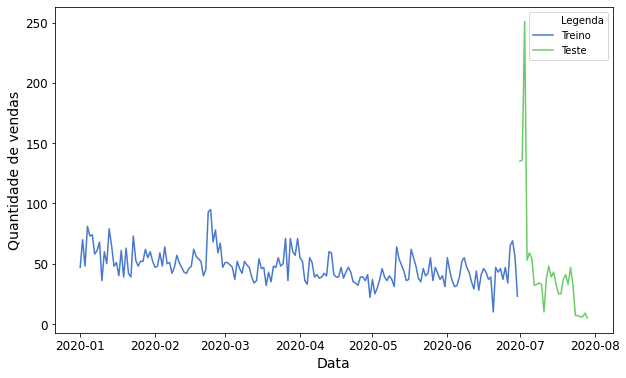

In [26]:
_ = plt.figure(figsize = [10, 6])
_ = sns.lineplot(x = "Lead Created At", y = "indicador_leads", hue = "Legenda", data = df_vol_diarios_compras, color = "black")
_ = plt.xlabel("Data", fontsize = 14, color = "black")
_ = plt.ylabel("Quantidade de vendas", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.savefig('grafico9.png')

### 4.2. Variáveis para a modelagem

#### 4.2.1. Variável resposta: Quantidade de compras por mês 

In [27]:
dados1 = pd.DataFrame(vol_diarios_compras).reset_index()

dados1["indicador_leads"] = dados1["indicador_leads"]*1.0

dados1.head()

,Lead Created At,indicador_leads
0,2020-01-01,47.0
1,2020-01-02,70.0
2,2020-01-03,48.0
3,2020-01-04,81.0
4,2020-01-05,73.0


#### 4.2.2. Variável explicativa: Volume diário médio da jornada

In [28]:
dados2 = pd.DataFrame(dados.resample("D", on = "Lead Created At")["tempo_jornada"].mean()).reset_index()

dados2.head()

,Lead Created At,tempo_jornada
0,2020-01-01,29.451766
1,2020-01-02,27.240385
2,2020-01-03,33.897341
3,2020-01-04,27.859436
4,2020-01-05,35.575490


#### 4.2.3. Join entre as primeiras variáveis

In [29]:
of_dados = pd.merge(dados1, dados2, on = ["Lead Created At"])

of_dados.head()

,Lead Created At,indicador_leads,tempo_jornada
0,2020-01-01,47.0,29.451766
1,2020-01-02,70.0,27.240385
2,2020-01-03,48.0,33.897341
3,2020-01-04,81.0,27.859436
4,2020-01-05,73.0,35.575490


#### 4.2.3. Variáveis explicativa: Comuns de séries temporais

In [30]:
import datetime

of_dados["day"] = of_dados["Lead Created At"].apply(lambda t: t.day)
of_dados["weekday"] = of_dados["Lead Created At"].apply(lambda x: x.weekday())
# of_dados["lag_1"] = of_dados["indicador_leads"].shift(1)
# of_dados["lag_2"] = of_dados["indicador_leads"].shift(2)
# of_dados["lag_3"] = of_dados["indicador_leads"].shift(3)

of_dados.head()

,Lead Created At,indicador_leads,tempo_jornada,day,weekday
0,2020-01-01,47.0,29.451766,1,2
1,2020-01-02,70.0,27.240385,2,3
2,2020-01-03,48.0,33.897341,3,4
3,2020-01-04,81.0,27.859436,4,5
4,2020-01-05,73.0,35.575490,5,6


#### 4.2.4. Variáveis explicativa: É feriado? (CANCELADA)

In [31]:
first_date = of_dados["Lead Created At"].min()
last_date = of_dados["Lead Created At"].max()

f"A primeira informação disponível é datada em {first_date} e a última é de {last_date}"

'A primeira informação disponível é datada em 2020-01-01 00:00:00 e a última é de 2020-07-29 00:00:00'

In [32]:
import holidays

feriados = holidays.Brazil()
feriados_br = pd.DataFrame({"x": feriados['2020-01-01': '2020-07-31']})
feriados_br["x"] = pd.to_datetime(feriados_br["x"], format = "%Y-%m-%d")

of_dados = pd.merge(of_dados, feriados_br, how='left', indicator = True, left_on = "Lead Created At", right_on= "x")
of_dados['feriado'] = np.where(of_dados['_merge'] == 'both', 1, 0)
of_dados = of_dados.drop(["x", "_merge"], axis = 1)


of_dados.head()

,Lead Created At,indicador_leads,tempo_jornada,day,weekday,feriado
0,2020-01-01,47.0,29.451766,1,2,1
1,2020-01-02,70.0,27.240385,2,3,0
2,2020-01-03,48.0,33.897341,3,4,0
3,2020-01-04,81.0,27.859436,4,5,0
4,2020-01-05,73.0,35.575490,5,6,0


### 4.3. Separando em treino e teste

In [33]:
treino = of_dados[of_dados["Lead Created At"] < "2020-07-01"]

x_treino = treino.drop(["Lead Created At", "indicador_leads"], axis = 1)
y_treino = treino["indicador_leads"]

In [34]:
teste = of_dados[of_dados["Lead Created At"] >= "2020-07-01"]

x_teste = teste.drop(["Lead Created At", "indicador_leads"], axis = 1)
y_teste = teste["indicador_leads"]

### 4.4. Pipeline

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVC


set_config(display = "diagram")

In [36]:
#--- Modelo

reg_lin = LinearRegression()

#--- Preprocessor

stand = StandardScaler()

#--- Pipeline

skl_pipeline = make_pipeline(stand, reg_lin)

skl_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [37]:
numeric_features = ["tempo_jornada"]

numeric_transformer = Pipeline(steps = [("scaler", stand)])

preprocessor = ColumnTransformer(transformers = [("num", numeric_transformer, numeric_features)])

model = Pipeline(steps = [("preprocessor", preprocessor), ("regressor", reg_lin)])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_jornada'])])),
                ('regressor', LinearRegression())])

In [38]:
model.fit(x_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_jornada'])])),
                ('regressor', LinearRegression())])

In [39]:
# Realiza as Previsões
y_pred = model.predict(x_teste)

# Avalia a performace do modelo
f"O RMSE é de {np.sqrt(mean_squared_error(y_teste, y_pred))}"

'O RMSE é de 49.04909386276597'

### 4.5. Procura dos melhores hiperparâmetros

In [40]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'regressor', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__scaler', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'regressor__copy_X', 'regressor__fit_intercept', 'regressor__n_jobs', 'regressor__normalize'])

In [41]:
params = {}

params["preprocessor__num__scaler"] = [None, StandardScaler(), MinMaxScaler()]

# Gridsearch
grid = GridSearchCV(model, params, cv = 5)

grid.fit(x_treino, y_treino)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tempo_jornada'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessor__num__scaler': [None, StandardScaler(),
                                                       MinMaxScaler()]})

In [42]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score").round(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num__scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.0155,0.0023,0.0066,0.0013,MinMaxScaler(),{'preprocessor__num__scaler': MinMaxScaler()},-0.8309,-0.5103,-0.0068,-0.7364,-0.4033,-0.4975,0.2891,1
0,0.0147,0.0025,0.0075,0.0020,None,{'preprocessor__num__scaler': None},-0.8309,-0.5103,-0.0068,-0.7364,-0.4033,-0.4975,0.2891,2
1,0.0272,0.0097,0.0124,0.0027,StandardScaler(),{'preprocessor__num__scaler': StandardScaler()},-0.8309,-0.5103,-0.0068,-0.7364,-0.4033,-0.4975,0.2891,3


In [43]:
best_estimator = grid.best_estimator_

In [44]:
preds = best_estimator.predict(x_teste)

preds

array([46.74409936, 46.58844451, 48.48494447, 47.51239409, 46.31723207,
       51.48627691, 46.0654283 , 47.46405496, 45.29576883, 42.66772266,
       45.24770639, 42.23839311, 46.26922572, 45.35902343, 43.76237907,
       46.67039629, 45.85910774, 47.94032123, 43.52654734, 47.6692492 ,
       45.20306191, 43.9829472 , 46.25031923, 45.53566998, 44.40241004,
       45.13354152, 44.28547317, 46.21383423, 49.50309067])

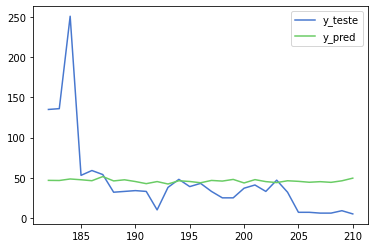

In [45]:
_ = pd.DataFrame({"y_teste": y_teste, "y_pred": preds}).plot(kind = "line")

## Regressão Simples - Treino e teste

In [46]:
reg_lin = LinearRegression()

reg_lin.fit(x_treino, y_treino)

LinearRegression()

In [47]:
y_pred = reg_lin.predict(x_teste)

# https://nbviewer.jupyter.org/github/bobcastaldeli/LASSO-Regression/blob/master/LassoRegression.ipynb

def performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return (print('MSE das previsões é {}'.format(round(mse, 2))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 2))+
                  '\nMAE das previsões é {}'.format(round(mae, 2))))

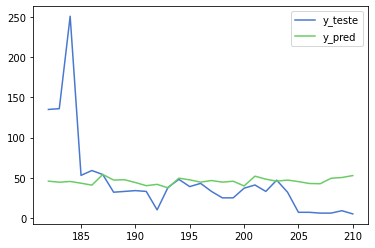

In [48]:
_ = pd.DataFrame({"y_teste": y_teste, "y_pred": y_pred}).plot(kind = "line")

## 5. Modelagem - ARIMA

In [49]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

treino1 = vol_diarios_compras.loc[:"2020-06-30"]
teste1 = vol_diarios_compras.loc["2020-07-01":"2020-07-29"]

teste1.shape

(29,)

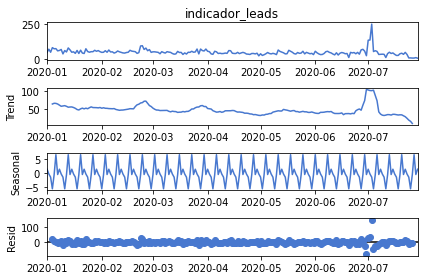

In [50]:
decomposition = sm.tsa.seasonal_decompose(vol_diarios_compras, model='additive')
fig = decomposition.plot()
plt.show()

In [51]:
model = ARIMA(treino1, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:        indicador_leads   No. Observations:                  182
Model:                     ARMA(2, 0)   Log Likelihood                -697.103
Method:                       css-mle   S.D. of innovations             11.139
Date:                Tue, 04 Aug 2020   AIC                           1402.205
Time:                        22:42:28   BIC                           1415.021
Sample:                    01-01-2020   HQIC                          1407.401
                         - 06-30-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.5658      1.853     25.671      0.000      43.934      51.197
ar.L1.indicador_leads     0.3330      0.073      4.538      0.000       0.189       0.477
ar.L2.in

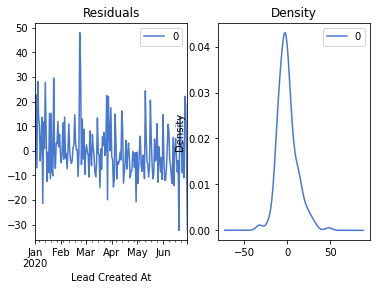

In [52]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 720x432 with 0 Axes>

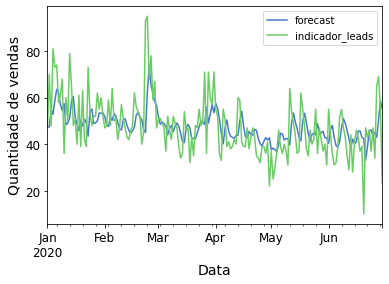

In [53]:
_ = plt.figure(figsize = [10, 6])
_ = model_fit.plot_predict(dynamic = False)
_ = plt.xlabel("Data", fontsize = 14, color = "black")
_ = plt.ylabel("Quantidade de vendas", fontsize = 14, color = "black")
_ = plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
_ = plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.savefig('grafico10.png')

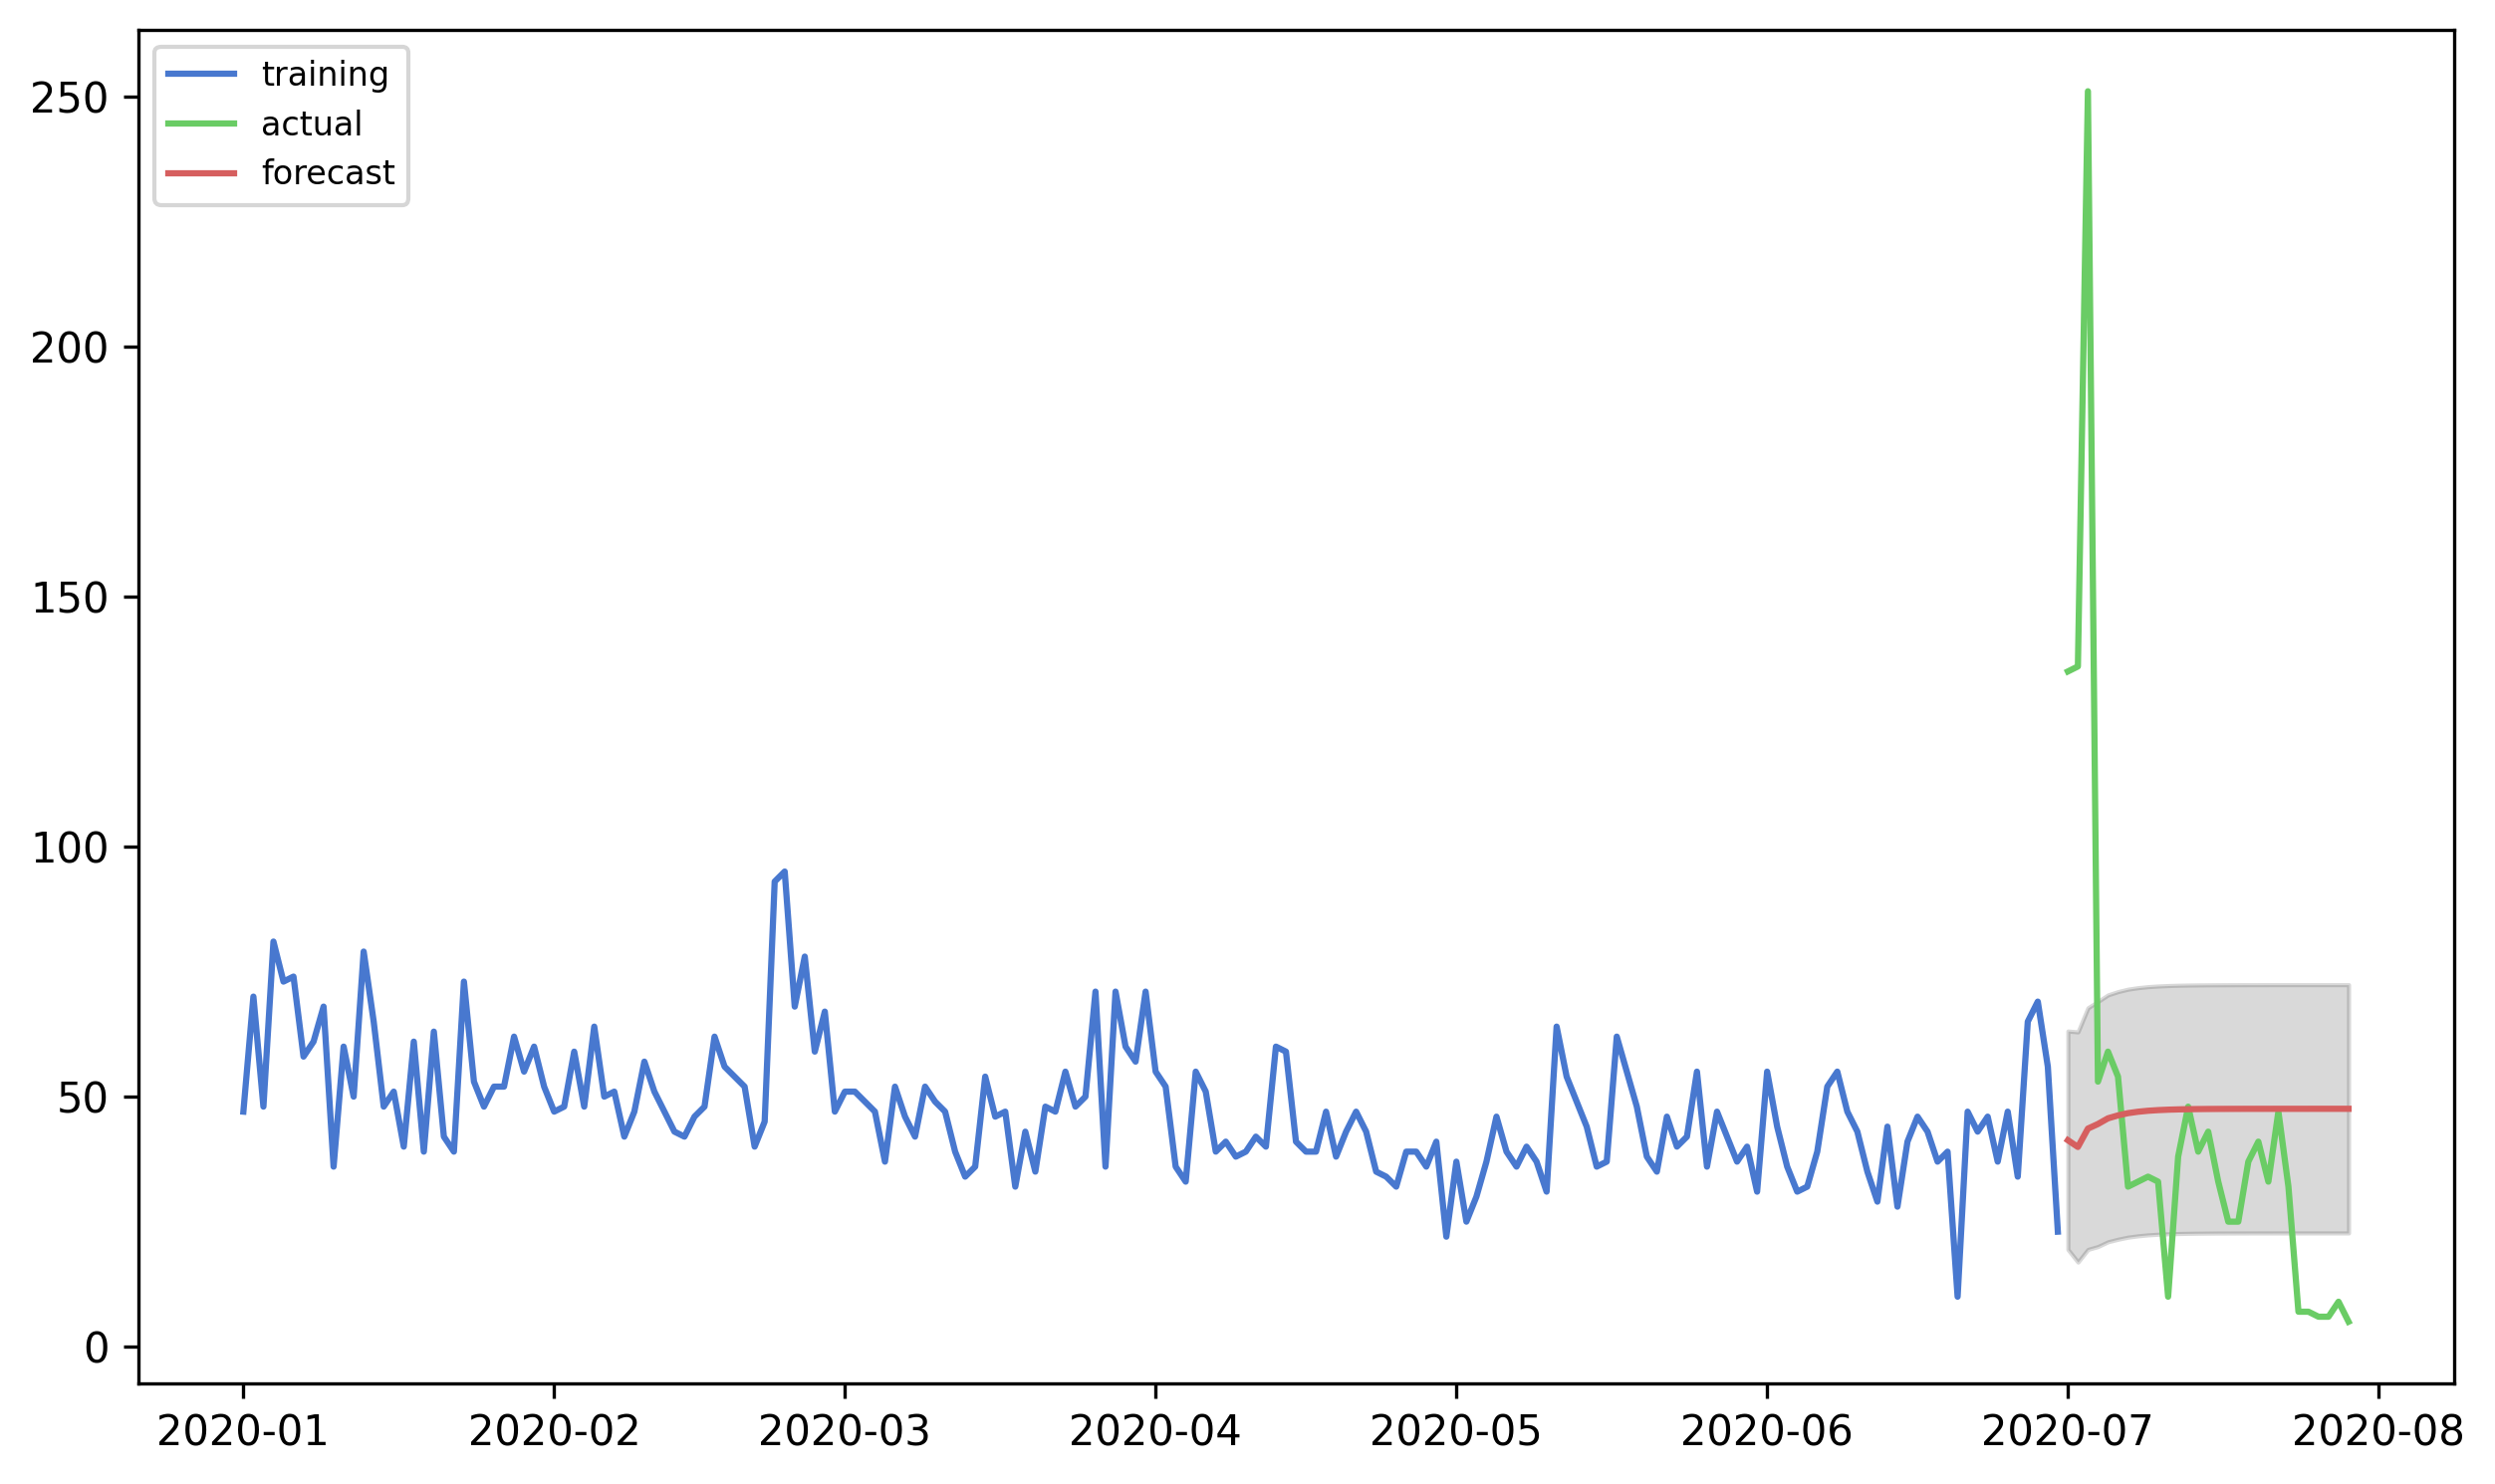

In [54]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# Build Model

model = ARIMA(treino1, order=(2, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(29, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=teste1.index)
lower_series = pd.Series(conf[:, 0], index=teste1.index)
upper_series = pd.Series(conf[:, 1], index=teste1.index)

# Plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(treino1, label='training')
plt.plot(teste1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)

plt.savefig('grafico11.png')

In [55]:
fc_series.head()

Lead Created At
2020-07-01    41.287836
2020-07-02    39.933350
2020-07-03    43.607862
2020-07-04    44.525947
2020-07-05    45.660613
Freq: D, dtype: float64

## Qual modelo usar?

**Resposta**: Regressão tunada se for olharmos os resultados (*)

- Entretanto, como vamos prever 7 passos a frente se não temos características desses passos para usar na regressão?

- **Resultado**: O modelo a ser utilizado é o ARIMA

In [56]:
#--- ARIMA (2, 0, 0)

performance(y_teste, fc_series)

MSE das previsões é 2606.4
RMSE das previsões é 51.05
MAE das previsões é 30.9


In [57]:
#--- Regressão "simples"

performance(y_teste, y_pred)

MSE das previsões é 2491.59
RMSE das previsões é 49.92
MAE das previsões é 29.22


In [58]:
#--- Regressão tunada

performance(y_teste, preds)

MSE das previsões é 2405.81
RMSE das previsões é 49.05
MAE das previsões é 28.76


## Previsão 7 dias a frente utilizando o modelo ARIMA (2, 0, 0)

In [59]:
vol_diarios_compras

Lead Created At
2020-01-01    47
2020-01-02    70
2020-01-03    48
2020-01-04    81
2020-01-05    73
              ..
2020-07-25     7
2020-07-26     6
2020-07-27     6
2020-07-28     9
2020-07-29     5
Freq: D, Name: indicador_leads, Length: 211, dtype: int64

In [60]:
modelo_oficial = ARIMA(vol_diarios_compras, order=(2,0,0))
model_fit = modelo_oficial.fit(disp = -1)

fc, se, conf = model_fit.forecast(7, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc)

In [61]:
fc_series

0    22.475687
1    28.458946
2    34.518903
3    38.162552
4    40.877513
5    42.714924
6    44.011446
dtype: float64

In [62]:
fc_series.mean()

35.88856705021341